# **Color customization**

### **กำหนดสีแบบแบ่งสเกลจาก Viridis**

> #### หรือใช้สีจาก **colorBrewer**

Loading required package: viridisLite



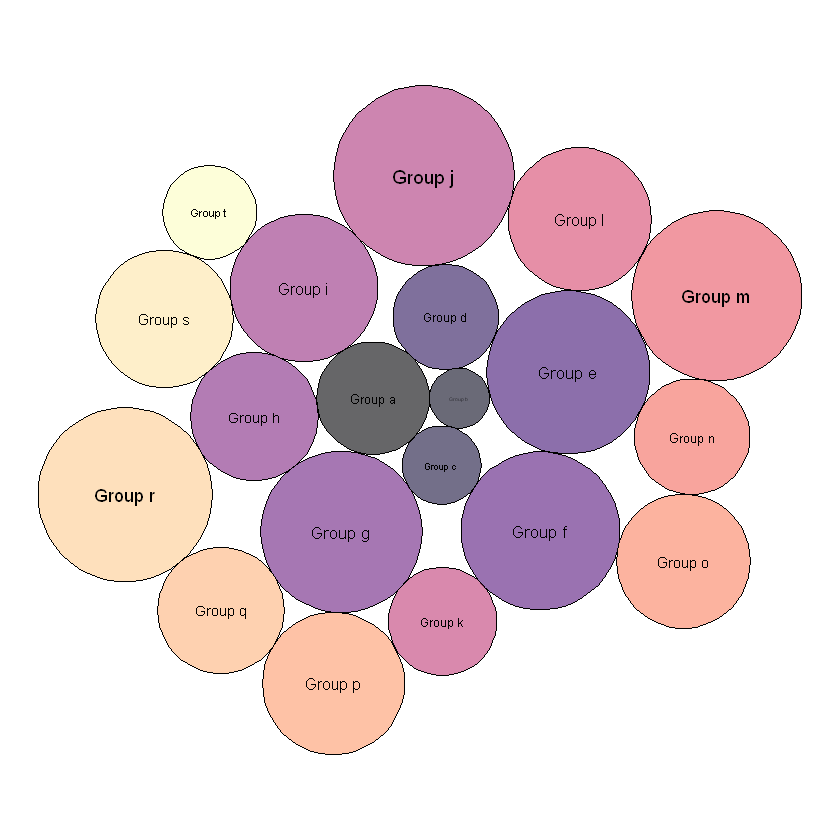

In [2]:
# libraries
library(packcircles)
library(ggplot2)
library(viridis)
 
# Create data
data <- data.frame(group=paste("Group", letters[1:20]), value=sample(seq(1,100),20)) 
 
# Generate the layout. sizetype can be area or radius, following your preference on what to be proportional to value.
packing <- circleProgressiveLayout(data$value, sizetype='area')
data <- cbind(data, packing)
dat.gg <- circleLayoutVertices(packing, npoints=50)
 
# Basic color customization
ggplot() + 
  geom_polygon(data = dat.gg, aes(x, y, group = id, fill=as.factor(id)), colour = "black", alpha = 0.6) +
  scale_fill_manual(values = magma(nrow(data))) +
  geom_text(data = data, aes(x, y, size=value, label = group)) +
  scale_size_continuous(range = c(1,4)) +
  theme_void() + 
  theme(legend.position="none") +
  coord_equal()

### **กำหนดสีตาม value ของข้อมูล**

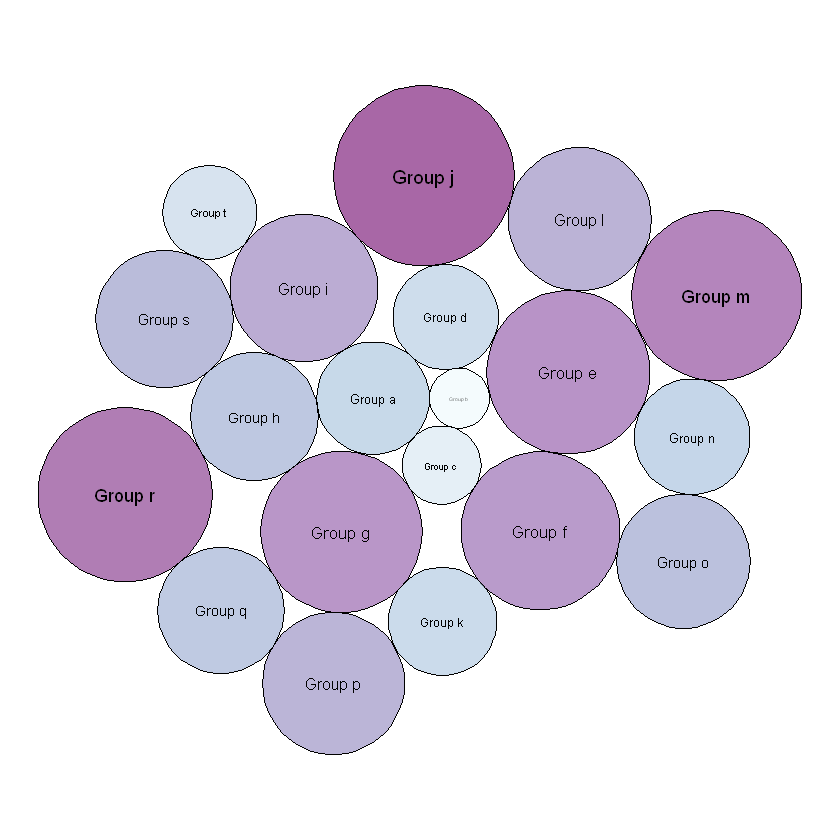

In [3]:
# First I need to add the 'value' of each group to dat.gg.
# Here I repeat each value 51 times since I create my polygons with 50 lines
dat.gg$value <- rep(data$value, each=51)

# Plot
ggplot() + 
  
  # Make the bubbles
  geom_polygon(data = dat.gg, aes(x, y, group = id, fill=value), colour = "black", alpha = 0.6) +
  scale_fill_distiller(palette = "BuPu", direction = 1 ) +
 
  # Add text in the center of each bubble + control its size
  geom_text(data = data, aes(x, y, size=value, label = group)) +
  scale_size_continuous(range = c(1,4)) +
 
  # General theme:
  theme_void()  + 
  theme(legend.position="none") + 
  coord_equal()

### **การกำหนด Background**

> #### โดยใช้ **theme()** และใส่ **plot.background()**

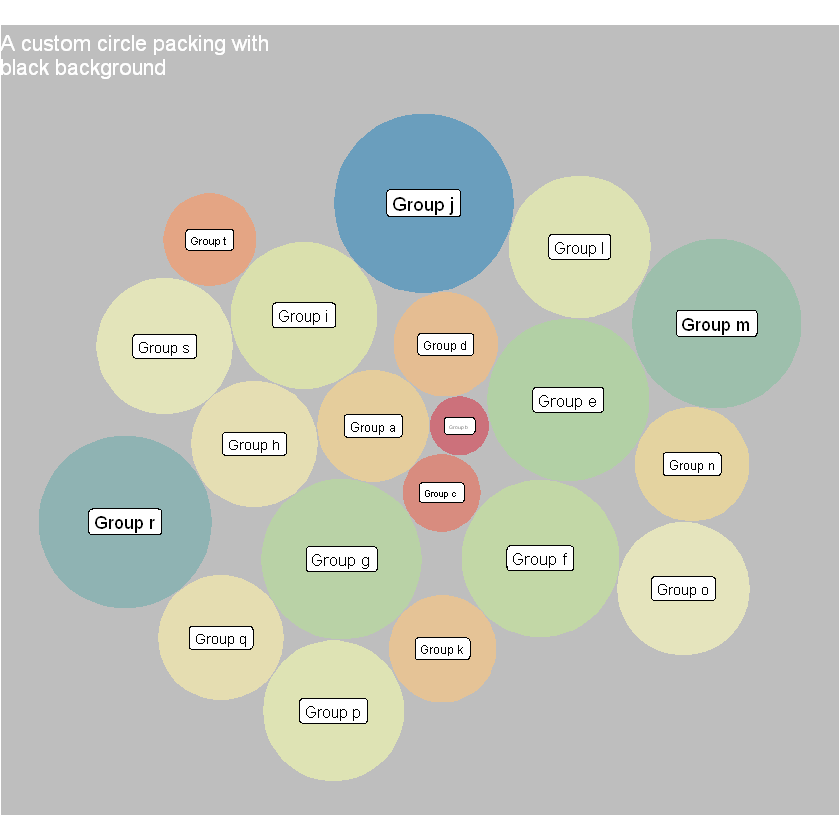

In [8]:
ggplot() + 
  
  # Make the bubbles
  geom_polygon(data = dat.gg, aes(x, y, group = id, fill=value), colour = "grey", alpha = 0.6, size=.5) +
  scale_fill_distiller(palette = "Spectral", direction = 1 ) +
  
  # Add text in the center of each bubble + control its size
  geom_label(data = data, aes(x, y, size=value, label = group)) +
  scale_size_continuous(range = c(1,4)) +
  
  # General theme:
  theme_void()  + 
  theme(
    legend.position="none",
    plot.background = element_rect(fill="grey"),
    plot.title = element_text(color="white") 
  ) + 
  coord_equal() +
  ggtitle("A custom circle packing with\nblack background")